<h1>LetsGrowMore (LGMVIPFEB2022) - Data Science Intern</h1>
    
<h3>Author: Sourabh Vijay Dohare <br></h3>
<h3>Task7 : Develop A Neural Network That Can Read Handwriting<br>
Level : Intermediate<br>
Language : Python</h3>

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import numpy as np
import matplotlib.pyplot as plt

<h3>Loading MNIST Dataset</h3>

In [4]:
(train_img, train_labels),(test_img, test_labels) = datasets.mnist.load_data()

In [5]:
train_img, test_img = train_img/255.0 , test_img/255.0

In [6]:
len(train_img)

60000

In [7]:
len(test_img)

10000

<h3>Visualization of image</h3>

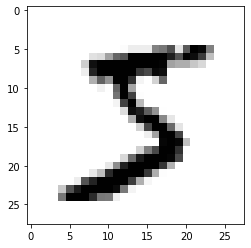

In [8]:
plt.imshow(train_img[0],cmap=plt.cm.gray_r, interpolation='nearest')

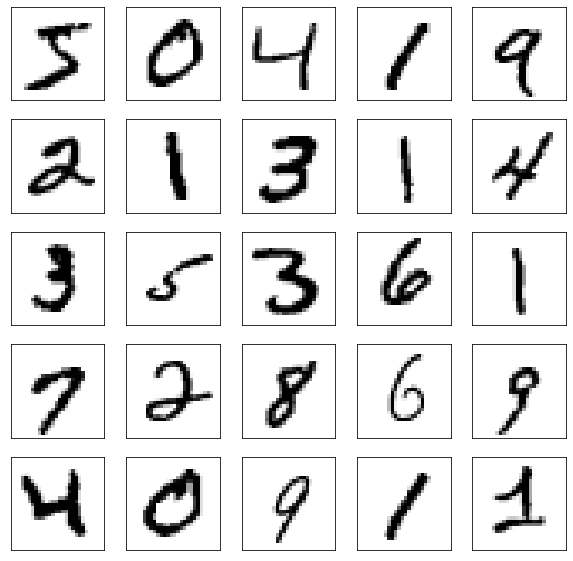

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap=plt.cm.binary)
plt.show()

<h3>Training the Model</h3>

In [10]:
model = tf.keras.models.Sequential([               # sequential model
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [11]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [12]:
model.fit(
    train_img, train_labels,
    epochs = 1,
    validation_data = (test_img, test_labels)
)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2658 - sparse_categorical_accuracy: 0.9240 - val_loss: 0.1526 - val_sparse_categorical_accuracy: 0.9513


In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

<h3>Compiling the Model</h3>

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['accuracy'])

<h3>Training the Model</h3>

In [26]:
model.fit(train_img, train_labels, epochs=25, validation_data=(test_img, test_labels))

Epoch 1/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.0991 - val_accuracy: 0.9729
Epoch 2/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0328 - accuracy: 0.9891 - val_loss: 0.0837 - val_accuracy: 0.9761
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0257 - accuracy: 0.9915 - val_loss: 0.0874 - val_accuracy: 0.9768
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0223 - accuracy: 0.9927 - val_loss: 0.0962 - val_accuracy: 0.9771
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0210 - accuracy: 0.9934 - val_loss: 0.1013 - val_accuracy: 0.9783
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0196 - accuracy: 0.9932 - val_loss: 0.1050 - val_accuracy: 0.9760
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0168 - accuracy: 0.9944 - val_loss: 0.1021 - val_accuracy:

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 103,124
Trainable params: 103,124
Non-trainable params: 0
__________________________________________________

<h3>Evaluating the Model</h3>

In [28]:
print(model.evaluate(test_img,test_labels))

313/313 [==============================] - 0s 998us/step - loss: 0.1705 - accuracy: 0.9749
[0.17047053575515747, 0.9749000072479248]


In [29]:
y_pred=prediction=model.predict(test_img)
y_pred

array([[-2.08951092e+01, -9.48202801e+00, -1.15451088e+01, ...,
         2.33565636e+01, -1.17652950e+01, -2.89206803e-02],
       [-1.79575043e+01, -3.91822004e+00,  2.97453804e+01, ...,
        -9.91172504e+00, -2.89679222e+01, -6.38704033e+01],
       [-1.81099567e+01,  1.40294695e+01, -7.72943115e+00, ...,
        -5.58827066e+00,  3.74871778e+00, -1.86393490e+01],
       ...,
       [-4.23639832e+01, -2.99338112e+01, -3.29844437e+01, ...,
        -4.24166870e+00, -1.06967001e+01,  2.09409189e+00],
       [-2.41920719e+01, -2.37687817e+01, -3.15199566e+01, ...,
        -2.65791073e+01,  6.23319745e-01, -1.98377686e+01],
       [-1.52913656e+01, -4.20485802e+01, -1.86769829e+01, ...,
        -6.83243561e+01, -3.50747261e+01, -3.45247345e+01]], dtype=float32)

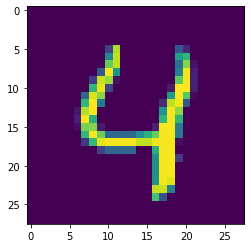

In [30]:
plt.imshow(test_img[4])

In [49]:
prediction=model.predict(test_img)
print(np.argmax(prediction[4]))

4


<h3>Our model predicted the number as 4, which is accurate</h3>

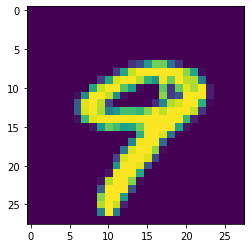

In [31]:
plt.imshow(test_img[9])

In [32]:
prediction=model.predict(test_img)
print(np.argmax(prediction[9]))

9


<h3>Our model predicted the number as 9, which is accurate</h3>

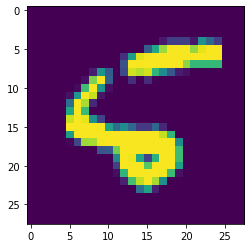

In [47]:
plt.imshow(test_img[8])

In [48]:
prediction=model.predict(test_img)
print(np.argmax(prediction[8]))

5
